In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Find the area of each contour
for contour in contours:
    area = cv2.contourArea(contour)
    print("Contour area:", area)

NameError: name 'contours' is not defined

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('layer1.jpg')
height, width, channels = image.shape
resized = cv2.resize(image, (int(width/2), int(height/2)))

# Convert the image to grayscale
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (51, 51), 0)


# Create a mask of the same size as the resized gray image
mask = np.full_like(gray, 255)

# Apply the mask to the original image
masked = cv2.bitwise_and(resized,resized, mask=mask)


#cannys edge Detection
edged = cv2.Canny(masked, 100, 200)

# Display the result
cv2.imshow('Blurred Image', masked)
cv2.waitKey(0)
cv2.destroyAllWindows()
edgecontours, _ = cv2.findContours(edged, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy = gray.copy()

# draw the contours on a copy of the original image
xyz = cv2.drawContours(image_copy, edgecontours, -1, (0,255, 0), 2)
#print(float(len(edgecontours)), "objects were found in this image.")
print = (xyz)
cv2.imshow("Edged image", edged)
cv2.imshow("contours", image_copy)
cv2.imwrite('image_copy.jpg', image_copy)
cv2.waitKey(0)




-1

###### Contour area is measured usinng greens theorem the area enclosed by a closed curve by integrating the product of the x and y coordinates along the curve. In practice, this function sums up the areas of the triangles formed by connecting the contour points to the contour centroid.

contour area [1.5, 0.0, 7.0, 25.0, 8.0, 55.0, 6.0, 18.5, 5.5, 249.5, 15.5, 10.0, 6.5, 2.5, 4.0, 12.5, 4.0, 93.5, 26.5, 10.0, 19.5, 13.0, 13.5, 20.5, 1553.0, 1.0, 22.5, 61.0, 5.0, 44.0, 8.5, 65.5, 4.0, 1.0, 38.5, 100.0, 15.5, 45.5, 44.5, 181.5]


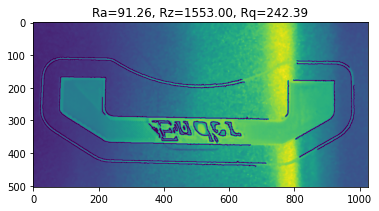

In [15]:
# Calculate the roughness parameters
areas = [cv2.contourArea(c) for c in edgecontours]
print("contour area",areas) 
mean_area = np.mean(areas)
std_area = np.std(areas)
ra = np.mean(np.abs(areas - mean_area))
rz = np.max(areas) - np.min(areas)
rq = np.sqrt(np.mean(
    np.square(areas - mean_area)))

# Display the results
plt.imshow(image_copy)
plt.title(f"Ra={ra:.2f}, Rz={rz:.2f}, Rq={rq:.2f}")
plt.show()

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
Digital_image = cv2.imread('slice__5.png')
h1, w1, channel = Digital_image.shape
resized = cv2.resize(Digital_image, (int(w1/2), int(h1/2)))

# Convert the image to grayscale
gray_image = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred_image = cv2.GaussianBlur(gray_image, (51, 51), 0)


# Create a mask of the same size as the resized gray image
mask1 = np.full_like(gray_image, 255)

# Apply the mask to the original image
masked1 = cv2.bitwise_and(resized,resized, mask=mask1)


#cannys edge Detection
edged1 = cv2.Canny(masked1, 100, 200)

# Display the result
cv2.imshow('Blurred Image', masked1)
cv2.waitKey(0)
cv2.destroyAllWindows()
edgecontours1, _ = cv2.findContours(edged1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = gray_image.copy()

# draw the contours on a copy of the original image
abc = cv2.drawContours(image_copy1, edgecontours1, -1, (0,255, 0), 2)
#print(float(len(edgecontours1)), "objects were found in this image.")
np.save("physical_contour.npy",abc)
cv2.imshow("Digital_Edged_image", edged1)
cv2.imshow("contours", image_copy1)
cv2.imwrite('image_copy1.jpg', image_copy1)
cv2.waitKey(0)



-1

# Digital Reference slicing of STL file

C:\Users\purav\anaconda3\lib\site-packages\pyvista\jupyter\notebook.py:58: UserWarning: Failed to use notebook backend: 

No module named 'trame.app'

Falling back to a static output.
  warnings.warn(


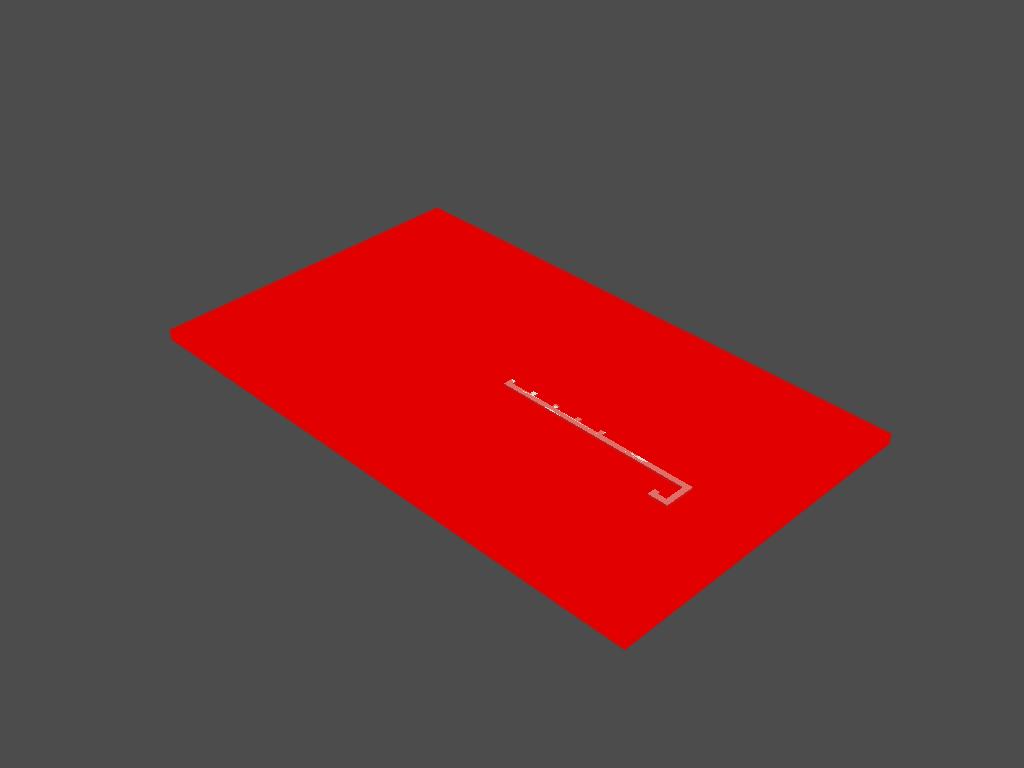

In [47]:
import pyvista as pv
import numpy as np
import cv2
# Load the STL file
pvmesh = pv.read("part1_upper mount.STL")

# Create a plotter object and add the mesh to it
plotter = pv.Plotter()
plotter.add_mesh(pvmesh)

vertices = pvmesh.points

# Find the maximum and minimum Z-coordinate values
max_z = np.amax(vertices[:,2])
min_z = np.amin(vertices[:,2])

#n is the required number of slices
n=15
# Define the range of Z-coordinate values for the slices
slice_z_values = np.linspace(min_z, max_z,n)

# Add slicing planes to the plotter
for z in slice_z_values:
    plane = pv.Plane(center=(0, 0, z), i_size=300, j_size=500)
    plotter.add_mesh(plane, color='red', opacity=0.5)
   
#Show the plotter
plotter.show()


#image of each slices
# Loop over the slicing planes and create a slice for each one
for i, z in enumerate(slice_z_values):
    # Create the slicing plane
    plane = pv.Plane(center=(0, 0, z), direction=(0, 0, -1),i_size=300, j_size=500)
    
    # Clip the mesh using the plane
    cut_mesh = pvmesh.clip_surface(plane)
    
    # Add the clipped mesh to a plotter
    plotter = pv.Plotter()
    plotter.add_mesh(cut_mesh, color='red', show_edges=True)
    # Set the camera position to view the mesh
    # Set the camera position to view the mesh from the top
    # Set the camera position to view the mesh from the top
    #plotter.camera_position = [(0, 0, np.max(cut_mesh.points[:, 2]) * 2), (0, 0, 0), (0, 1, 0)]

    #plotter.camera_position = [(0, 0, np.max(cut_mesh.points[:, 2]) * 2), (0, 0, 0), (0, 1, 0)]


    
    plotter.screenshot( f'slice_{i}.png') # Save the image to a file
    image = cv2.imread(f'slice_{i}.png')
    #cv2.imshow("slice_{i}.png")


# Generating Contour of images and Resizing 

### Load The images

In [56]:

# Importing Image class from PIL module
from PIL import Image, ImageFilter
 
# Opens a image in RGB mode
im = Image.open(r"layer1.jpg")


# Blurring the image
im1 = im.filter(ImageFilter.GaussianBlur(4))
img_array = np.array(im1)
# Shows the image in image viewer
im1.show()
 


In [54]:
type(im1)

PIL.Image.Image

In [55]:
type(ref_image)

numpy.ndarray

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
# Load the reference image

ref_image = cv2.imread("test15.jpg")
im = Image.open(r"test15.jpg")
# Blurring the image
im1 = im.filter(ImageFilter.GaussianBlur(4))
#convert image to array
img_array = np.array(im1)
height1, width1, channel1 = ref_image.shape
ref_contour = cv2.resize(img_array, (int(width1/4), int(height1/4)))

# load image to be resized
second_image = cv2.imread('cube.jpg')
second_image_ = Image.open(r"cube.jpg")
# Blurring the image
im2 = second_image_.filter(ImageFilter.GaussianBlur(4))
#convert image to array
img_array2 = np.array(im2)
height2, width2, channel2 = second_image.shape
second = cv2.resize(img_array2, (int(width2/5), int(height2/5)))

### For Reference Contour edge detection


In [9]:
# Convert the images to grayscale
# Convert the image to grayscale
gray = cv2.cvtColor(ref_contour, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (51, 51), 0)



# Create a mask of the same size as the resized gray image
mask1 = np.full_like(gray, 255)

# Apply the mask to the original image
masked1 = cv2.bitwise_and(ref_contour,ref_contour, mask=mask1)


#cannys edge Detection
edged1 = cv2.Canny(masked1, 100, 200)

# Display the result
cv2.imshow('Blurred Image', masked1)
cv2.waitKey(0)
cv2.destroyAllWindows()
edgecontours1, _ = cv2.findContours(edged1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy1 = gray.copy()

# draw the contours on a copy of the original image
abc = cv2.drawContours(image_copy1, edgecontours1, -1, (0,255, 0), 2)
#print(float(len(edgecontours)), "objects were found in this image.")
#print = (xyz)
cv2.imshow("Edged image", edged1)
cv2.imshow("contours", image_copy1)
cv2.imwrite('image_copy.jpg', image_copy1)
cv2.waitKey(0)

#for contour1 in ref_contours:
  #  x1, y1, w1, h1 = cv2.boundingRect(contour1)
  #  rect_1 = cv2.rectangle(abc, (x1, y1), (x1 + w1, y1 + h1), (0, 255, 0), 2)
# Display the result
#cv2.imshow('Bounding Rectangles', abc)
#cv2.waitKey(0)

-1

### For Second Contour edge detection


In [10]:
# Convert the image to grayscale
gray2 = cv2.cvtColor(second, cv2.COLOR_BGR2GRAY)
#blurred = cv2.GaussianBlur(gray, (51, 51), 0)


# Create a mask of the same size as the resized gray image
mask2 = np.full_like(gray2, 255)

# Apply the mask to the original image
masked2 = cv2.bitwise_and(second,second, mask=mask2)


#cannys edge Detection
edged2 = cv2.Canny(masked2, 100, 200)

# Display the result
cv2.imshow('Blurred Image', masked2)
cv2.waitKey(0)
cv2.destroyAllWindows()
edgecontours2, _ = cv2.findContours(edged2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
image_copy2 = gray2.copy()

# draw the contours on a copy of the original image
xyz = cv2.drawContours(image_copy2, edgecontours2, -1, (0,255, 0), 2)
#print(float(len(edgecontours)), "objects were found in this image.")
print = (xyz)
cv2.imshow("Edged image", edged2)
cv2.imshow("contours", image_copy2)
cv2.imwrite('image_copy.jpg', image_copy2)
cv2.waitKey(0)

#for contour2 in second_contours:
  #  x2, y2, w2, h2 = cv2.boundingRect(contour2)
  #  rect_2 = cv2.rectangle(xyz, (x2, y2), (x2 + w2, y2 + h2), (0, 255, 0), 2)
# Display the result
#cv2.imshow('Bounding Rectangle second', xyz)
#cv2.waitKey(0)


-1

### Rescale the secod contour with the Reference 

In [11]:
import cv2
import numpy as np

# Read the two edge images
#first = cv2.imread('slice_5.png')
#height, width, channel = first.shape
#img1= cv2.resize(first, (int(width/4), int(height/4)))
#second = cv2.imread('slice__5.png')
#img2= cv2.resize(second, (int(width/4), int(height/4)))

# Perform edge detection using Canny
#edges1 = cv2.Canny(img1, 100, 200)
#edges2 = cv2.Canny(img2, 100, 200)

# Find corresponding key points in both images using ORB feature matching
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(edged1, None)
kp2, des2 = orb.detectAndCompute(edged2, None)

bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Get the corresponding points in both images
pts1 = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1,1,2)

# Find the transformation matrix using cv2.findHomography()
M, _ = cv2.findHomography(pts1, pts2, cv2.RANSAC,5.0)

# Warp one of the images so that it overlaps with the other image
result = cv2.warpPerspective(edged1, M, (second.shape[1], second.shape[0]))

# Display the result
cv2.imshow("image1",edged1)
cv2.imshow("image2",edged2)
cv2.imshow("Result", result)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [13]:
import cv2
import numpy as np

# Load the images
#img1 = cv2.imread('layer1.jpg')
#img2 = cv2.imread('layer2.jpg')

# Convert to grayscale
#gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
#gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect features using ORB
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(edged1, None)
kp2, des2 = orb.detectAndCompute(edged2, None)

# Match features using a Brute-Force Matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Draw top matches
img3 = cv2.drawMatches(edged1, kp1, edged2, kp2, matches[:100], None, flags=2)

# Display the result
cv2.imshow('Matches', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()


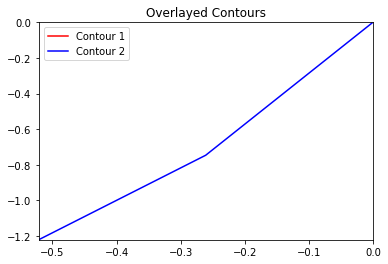

In [12]:
import matplotlib.pyplot as plt
# Plot the first contour in red
plt.plot(edged2[:, 0], edged2[:, 1], color='r', label='Contour 1')

# Plot the second contour in blue
plt.plot(M[:, 0], M[:, 1], color='b', label='Contour 2')

# Set the x and y axis limits to the maximum and minimum values of the two contours
xlim = [min(np.min(edged2[:, 0]), np.min(M[:, 0])), max(np.max(edged2[:, 0]), np.max(M[:, 0]))]
ylim = [min(np.min(edged2[:, 1]), np.min(M[:, 1])), max(np.max(edged2[:, 1]), np.max(M[:, 1]))]
plt.xlim(xlim)
plt.ylim(ylim)

# Add legend and title
plt.legend()
plt.title('Overlayed Contours')

# Show the plot
plt.show()







In [7]:
import cv2
# Overlap the two images
alpha = 0.5
beta = 1.0 - alpha
img_final = cv2.addWeighted(edged2, alpha, result, beta, 0.0)
# Display the final image
cv2.imshow('Contours', img_final)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [40]:

# Calculate the MSE between the two contours
mse = np.mean((edged2 - result)**2)

# Calculate the distortion value
distortion = np.sqrt(mse)

# Print the distortion value to the console
distortion

2.0004051093767488

In [42]:
#Flatten images into 1D arrays
reference_array = edged2.flatten()
representation_array = result.flatten()

# Calculate correlation coefficient
corr_coef = np.corrcoef(reference_array, representation_array)[0,1]
#print('Correlation Coefficient:', corr_coef)
corr_coef

0.3338015128324766

In [45]:
import cv2

import numpy as np


# Load the curvy and perfect line contours

#curvy_contour = np.load(edged1)

#line_contour = np.load(edged2)


# Compute the length of each contour

curvy_length = cv2.arcLength(edged1, True)

line_length = cv2.arcLength(edged2, True)


# Resample both contours to have the same number of points

num_points = 100

curvy_contour = cv2.approxPolyDP(curvy_contour, curvy_length / num_points, True)

line_contour = cv2.approxPolyDP(line_contour, line_length / num_points, True)


# Initialize an array to store the distances between the two contours

distances = np.zeros(len(curvy_contour))


# For each point on the curvy contour, find the closest point on the line contour

for i, point in enumerate(curvy_contour):
    distances[i] = np.min(np.sqrt(np.sum((line_contour - point) ** 2, axis=1)))


# Compute the mean and maximum distances

mean_distance = np.mean(distances)

max_distance = np.max(distances)


# Visualize the distance between the two contours

# Plot the curvy contour and the perfect line contour together

image = np.zeros((500, 500))

cv2.drawContours(image, [curvy_contour], -1, (255, 255, 255), 2)

cv2.drawContours(image, [line_contour], -1, (255, 0, 0), 2)

# Highlight the points where the distance is the greatest

for i, point in enumerate(curvy_contour):
    if distances[i] == max_distance:
        cv2.circle(image, tuple(point[0]), 5, (0, 0, 255), -1)


# Display the results

cv2.imshow('Distance Analysis', image)

cv2.waitKey(0)

cv2.destroyAllWindows()





error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\shapedescr.cpp:280: error: (-215:Assertion failed) count >= 0 && (depth == CV_32F || depth == CV_32S) in function 'cv::arcLength'


In [44]:
import cv2
import numpy as np

# Load two contours
contour1 = edged1 # replace with your contour points
contour2 = edged2 # replace with your contour points

# Find the outermost points on each contour
def find_outermost_points(contour):
    leftmost = tuple(contour[contour[:,:].argmin()][0])
    rightmost = tuple(contour[contour[:,:].argmax()][0])
    topmost = tuple(contour[contour[:,:,1].argmin()][0])
    bottommost = tuple(contour[contour[:,:,1].argmax()][0])
    return leftmost, rightmost, topmost, bottommost

outermost1 = find_outermost_points(contour1)
outermost2 = find_outermost_points(contour2)

# Sort the outermost points by their position
def sort_points(points):
    x_sorted = sorted(points, key=lambda x: x[0])
    leftmost = x_sorted[0]
    rightmost = x_sorted[-1]
    y_sorted = sorted(points, key=lambda x: x[1])
    topmost = y_sorted[0]
    bottommost = y_sorted[-1]
    return leftmost, rightmost, topmost, bottommost

sorted1 = sort_points(outermost1)
sorted2 = sort_points(outermost2)

# Calculate the scaling factor for each contour
def calculate_scaling_factor(points1, points2):
    distance1 = np.sqrt((points1[2][0]-points1[0][0])**2 + (points1[2][1]-points1[0][1])**2)
    distance2 = np.sqrt((points2[2][0]-points2[0][0])**2 + (points2[2][1]-points2[0][1])**2)
    scaling_factor = distance2 / distance1
    return scaling_factor

scaling_factor1 = calculate_scaling_factor(sorted1, sorted2)
scaling_factor2 = calculate_scaling_factor(sorted2, sorted1)

# Resize each contour using the scaling factor
def resize_contour(contour, scaling_factor):
    centroid = np.mean(contour, axis=0)
    contour = (contour - centroid) * scaling_factor + centroid
    return contour

resized1 = resize_contour(contour1, scaling_factor1)
resized2 = resize_contour(contour2, scaling_factor2)


TypeError: 'numpy.uint8' object is not iterable

In [2]:
pip install pyvista

Note: you may need to restart the kernel to use updated packages.


In [15]:
ref_contour = cv2.imread("image_copy.jpg")


# "the Ra value obtained from image processing can be compared with the Ra value obtained from physical measurement using a profilometer."

## 1.Mean square error

In [ ]:
import cv2

# Load reference and representation images
reference_img = cv2.imread('reference_image.jpg')
representation_img = cv2.imread('representation_image.jpg')

# Calculate MSE
mse = ((reference_img - representation_img) ** 2).mean(axis=None)
print('MSE:', mse)

## 2. Correlation Coefficient 

In [ ]:
import numpy as np

# Load reference and representation images
reference_img = cv2.imread('reference_image.jpg', 0)
representation_img = cv2.imread('representation_image.jpg', 0)

# Flatten images into 1D arrays
reference_array = reference_img.flatten()
representation_array = representation_img.flatten()

# Calculate correlation coefficient
corr_coef = np.corrcoef(reference_array, representation_array)[0,1]
print('Correlation Coefficient:', corr_coef)

## 3. Structural similarity Index 

In [ ]:
from skimage.metrics import structural_similarity as ssim

# Load reference and representation images
reference_img = cv2.imread('reference_image.jpg', 0)
representation_img = cv2.imread('representation_image.jpg', 0)

# Calculate SSIM
ssim_score = ssim(reference_img, representation_img, data_range=representation_img.max() - representation_img.min())
print('SSIM:', ssim_score)
